### Libraries


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [83]:
df = pd.read_csv("watson_healthcare_modified.csv")

print(df.shape)
df.head(5)

(1676, 35)


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [84]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [85]:
df.describe()


,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Data Cleaning


In [86]:
df = df.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeID"], axis=1)

In [87]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [88]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

df_num.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [89]:
df_cat.head()


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,No,Travel_Rarely,Cardiology,Life Sciences,Female,Nurse,Single,Yes
1,No,Travel_Frequently,Maternity,Life Sciences,Male,Other,Married,No
2,Yes,Travel_Rarely,Maternity,Other,Male,Nurse,Single,Yes
3,No,Travel_Frequently,Maternity,Life Sciences,Female,Other,Married,Yes
4,No,Travel_Rarely,Maternity,Medical,Male,Nurse,Married,No


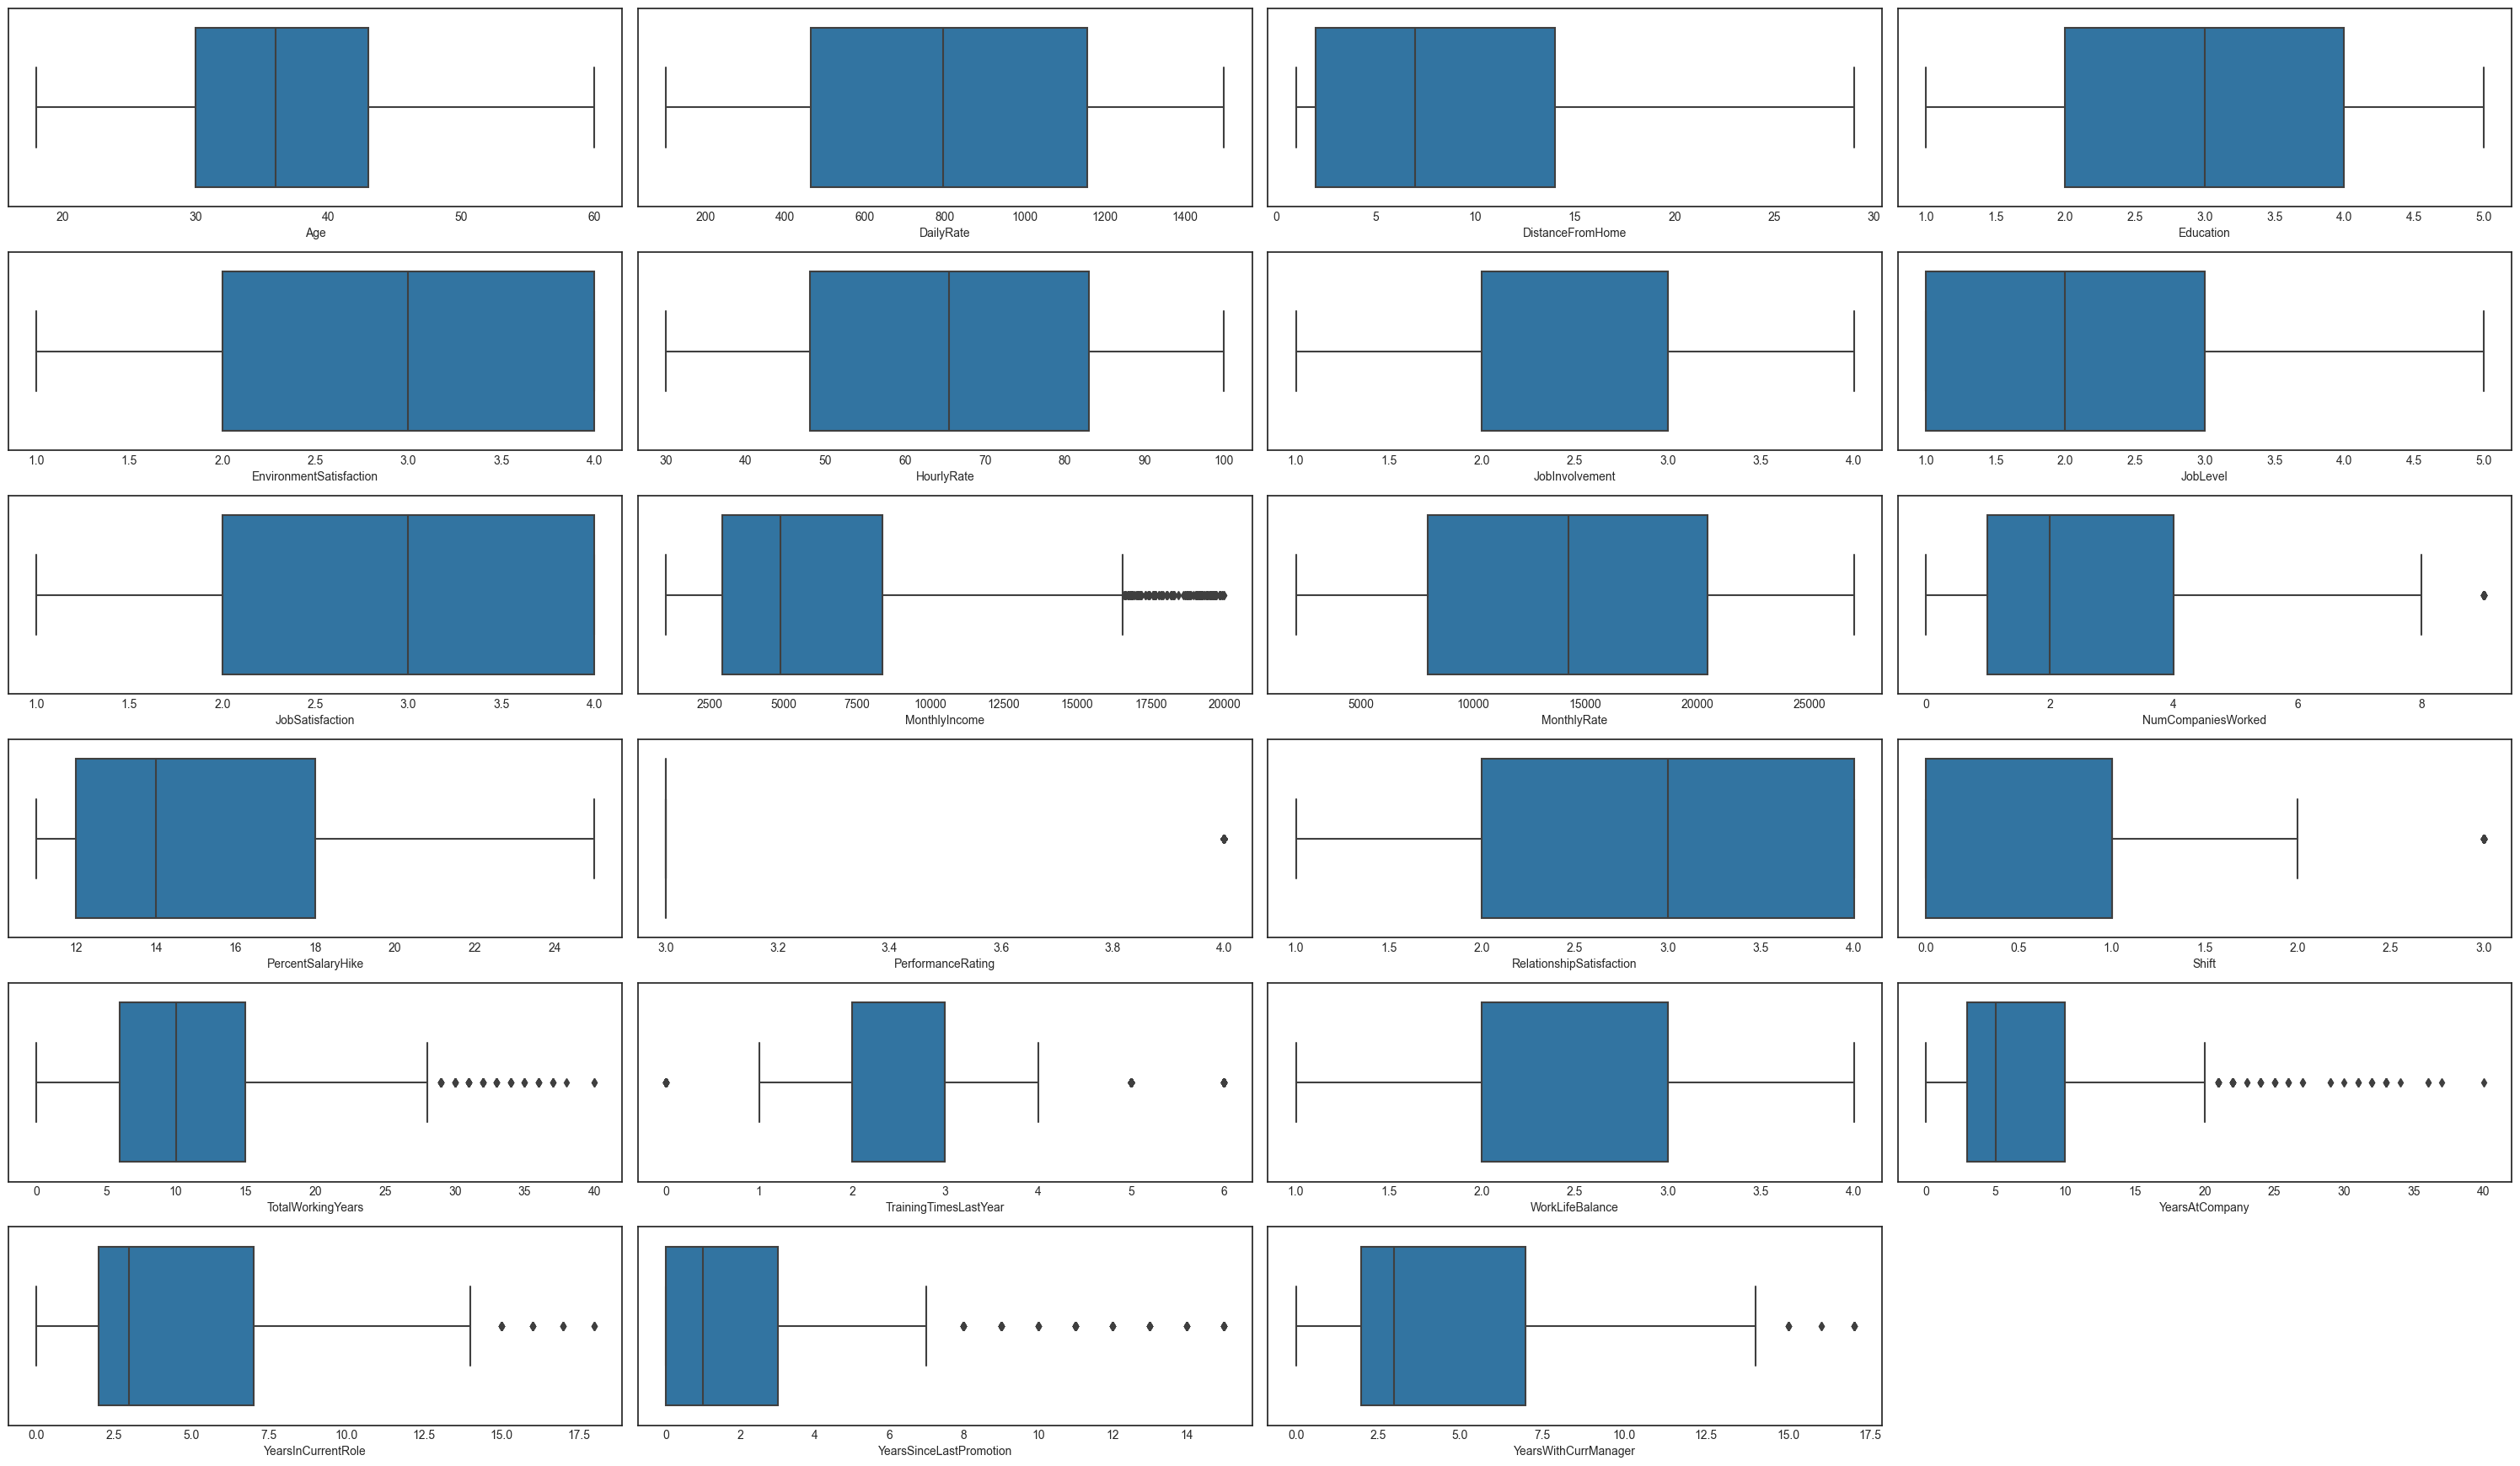

In [90]:
plt.figure(figsize=(30, 20))
for i, column in enumerate(df_num):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(data=df_num, x=column)

plt.tight_layout()

In [91]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Data Exploration


In [92]:
plt.style.use("seaborn-v0_8-white")

colors = sns.color_palette()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>],
       [<Axes: title={'center': 'Shift'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
        <A

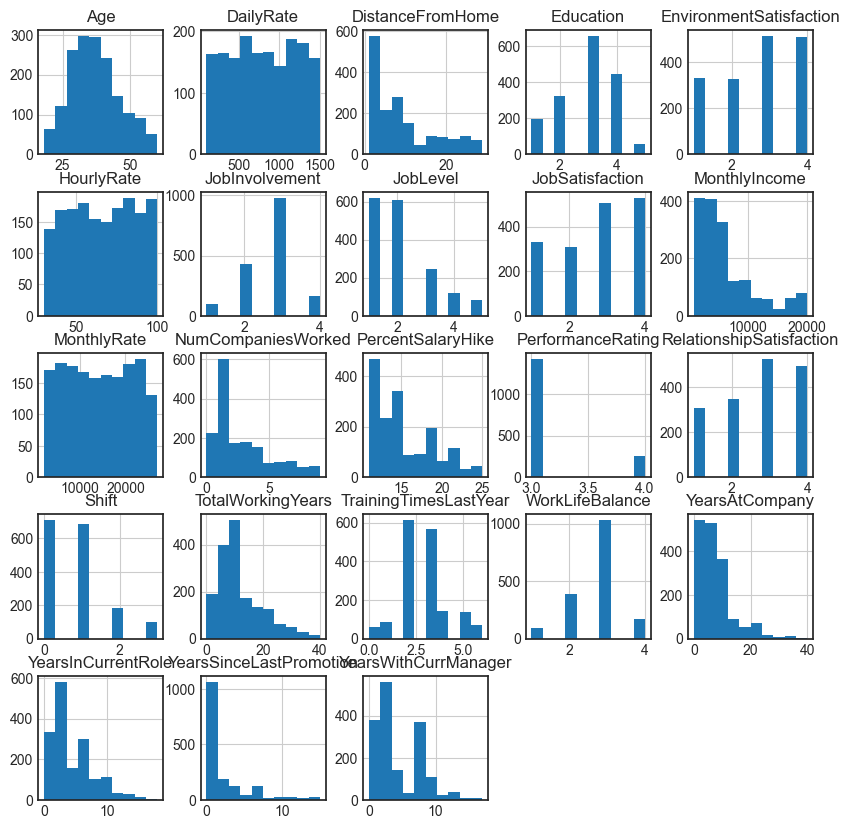

In [93]:
df.hist(figsize=(10, 10))


In [94]:
df["Attrition"].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [95]:
df["AnnualIncome"] = df["MonthlyIncome"] * 12

yr_income = round(
    df.groupby(["JobRole"])["AnnualIncome"].mean().sort_values(ascending=False), 2
)

<Axes: title={'center': 'Job Roles'}, ylabel='JobRole'>

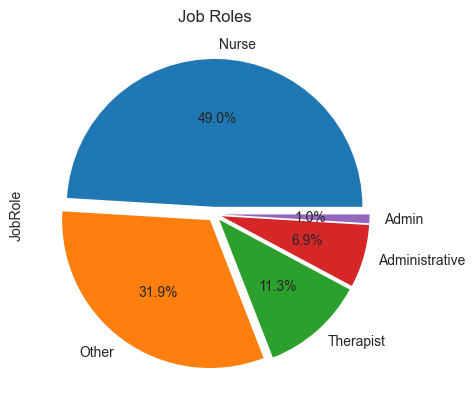

In [96]:
df["JobRole"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Job Roles",
    explode=[0.05, 0.05, 0.05, 0.05, 0.05],
)

Text(0.5, 1.0, 'Average Annual Income')

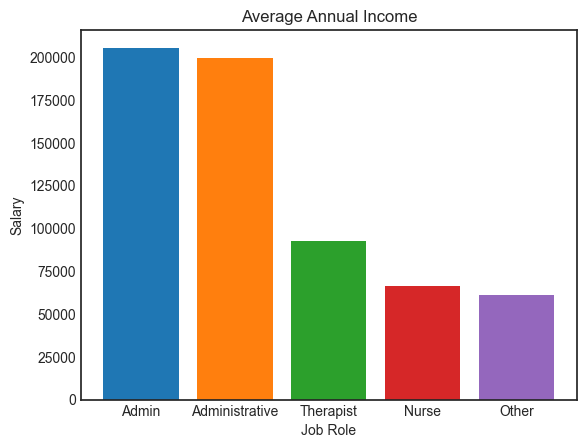

In [97]:
plt.bar(yr_income.index, yr_income.values, color=colors)
plt.xlabel("Job Role")
plt.ylabel("Salary")
plt.title("Average Annual Income")

<Axes: title={'center': 'Department Size'}, xlabel='Count', ylabel='Department'>

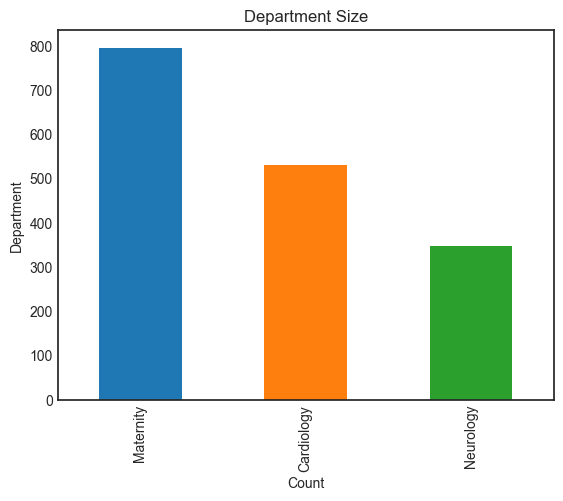

In [98]:
df["Department"].value_counts().plot(
    kind="bar",
    title="Department Size",
    xlabel="Count",
    ylabel="Department",
    color=colors,
)


<Axes: title={'center': 'Annual Income by Department'}, xlabel='Income', ylabel='Department'>

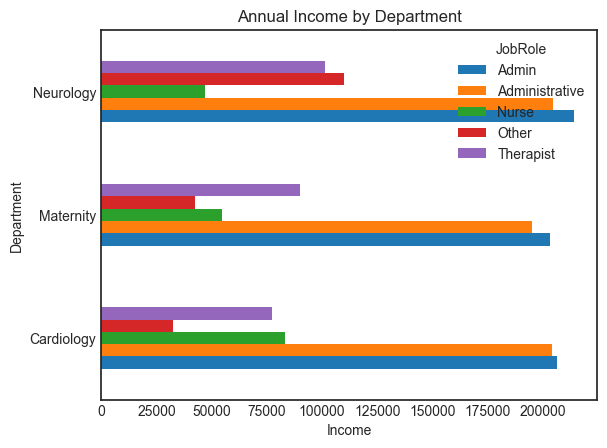

In [99]:
s = df.groupby(["Department", "JobRole"])["AnnualIncome"].mean()

s = s.unstack(-1)

s.plot(kind="barh", xlabel="Income", title="Annual Income by Department")


<Axes: title={'center': 'Attrition by Department'}, xlabel='Department', ylabel='Count'>

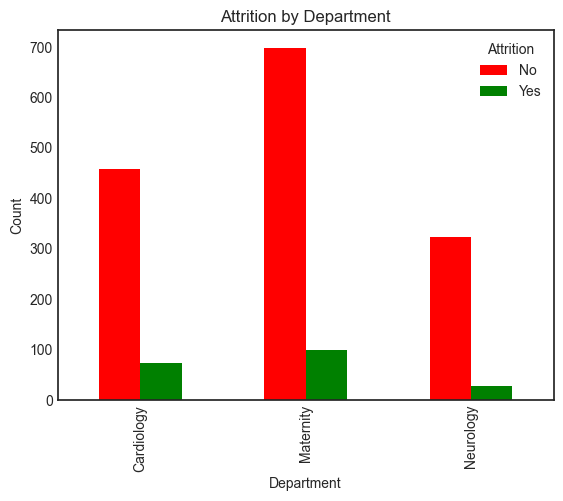

In [100]:
by_dep = df.groupby(["Department"])["Attrition"].value_counts()

by_dep = by_dep.unstack(-1)
by_dep.plot(
    kind="bar", ylabel="Count", title="Attrition by Department", color=["red", "green"]
)


In [101]:
def tick_format(X, y):
    i = 0
    ticks = []
    for i in range(X + 1):
        i += y
        ticks.append(i)

    return ticks


<Axes: title={'center': 'Average Years in Role'}, xlabel='Role', ylabel='Years'>

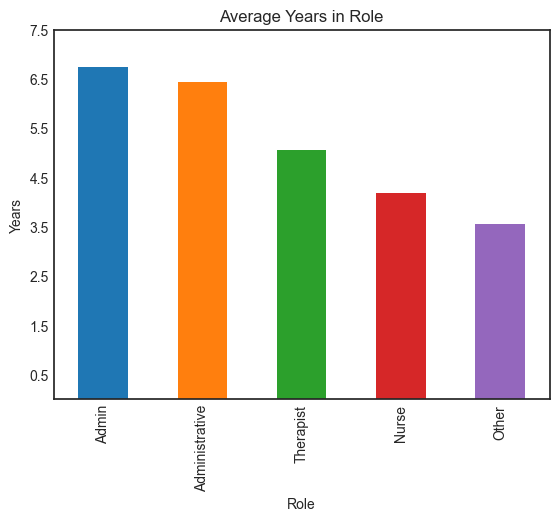

In [102]:
df.groupby(["JobRole"])["YearsInCurrentRole"].mean().sort_values(ascending=False).plot(
    kind="bar",
    color=colors,
    xlabel="Role",
    ylabel="Years",
    yticks=tick_format(7, 0.5),
    title="Average Years in Role",
)

In [103]:
df.groupby(["Department"])["Attrition"].value_counts()

Department  Attrition
Cardiology  No           457
            Yes           74
Maternity   No           698
            Yes           98
Neurology   No           322
            Yes           27
Name: Attrition, dtype: int64

<Axes: title={'center': 'Attrition by Role'}, xlabel='JobRole', ylabel='Count'>

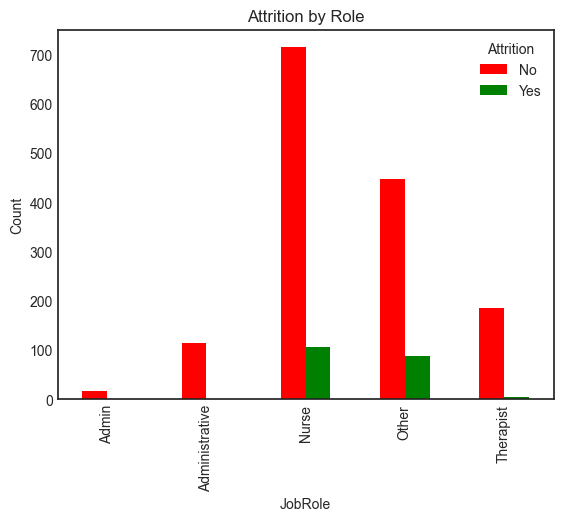

In [104]:
attrition = df.groupby("JobRole")["Attrition"].value_counts()

attrition = attrition.unstack(level=-1)

attrition.plot(
    kind="bar",
    stacked=False,
    color=["red", "green"],
    ylabel="Count",
    title="Attrition by Role",
)

In [105]:
rating = round(
    df.groupby(["JobRole"])[
        "RelationshipSatisfaction",
        "PerformanceRating",
        "JobSatisfaction",
        "WorkLifeBalance",
    ].mean(),
    2,
)

rating


/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_77447/1104781259.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["JobRole"])[


,RelationshipSatisfaction,PerformanceRating,JobSatisfaction,WorkLifeBalance
JobRole,,,,
Admin,3.19,3.25,2.94,3.00
Administrative,2.70,3.16,2.75,2.85
Nurse,2.70,3.14,2.76,2.76
Other,2.73,3.16,2.71,2.74
Therapist,2.72,3.16,2.72,2.81


<Axes: xlabel='MaritalStatus'>

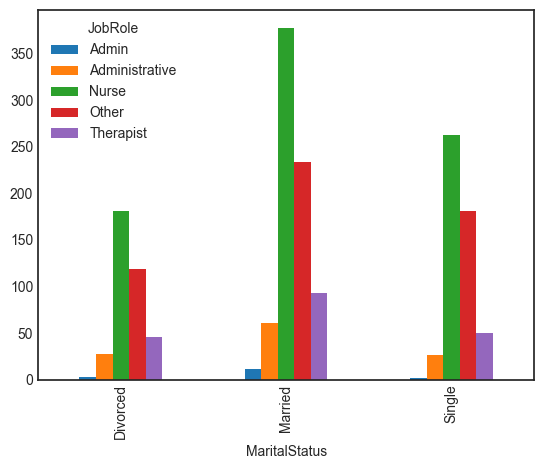

In [106]:
relationship = df.groupby(["JobRole"])["MaritalStatus"].value_counts()

relationship = relationship.unstack(level=-2)

relationship.plot(kind="bar")

In [107]:
shifts = df[["JobRole", "Shift"]]


def transform_shift(shift):
    if shift == 0:
        return "First"
    elif shift == 1:
        return "Second"
    elif shift == 2:
        return "Third"
    else:
        return "Forth"


transform_shift(0)

shifts["Shift"] = shifts["Shift"].apply(transform_shift)

/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_77447/3041372941.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifts["Shift"] = shifts["Shift"].apply(transform_shift)


<Axes: title={'center': 'Shift Count by Job Role'}, xlabel='Shift', ylabel='Count'>

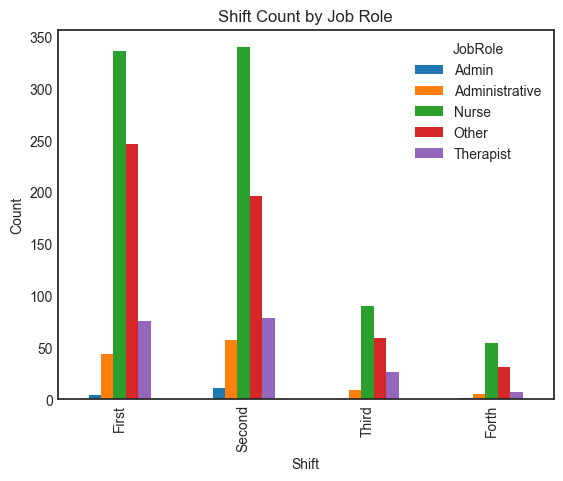

In [108]:
shift = shifts.groupby(["JobRole"])["Shift"].value_counts()

s = ["First", "Second", "Third", "Forth"]
shift = shift.unstack(level=-2)

shift.reindex(s).plot(kind="bar", ylabel="Count", title="Shift Count by Job Role")

In [109]:
correlation = df.corr()


/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_77447/3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

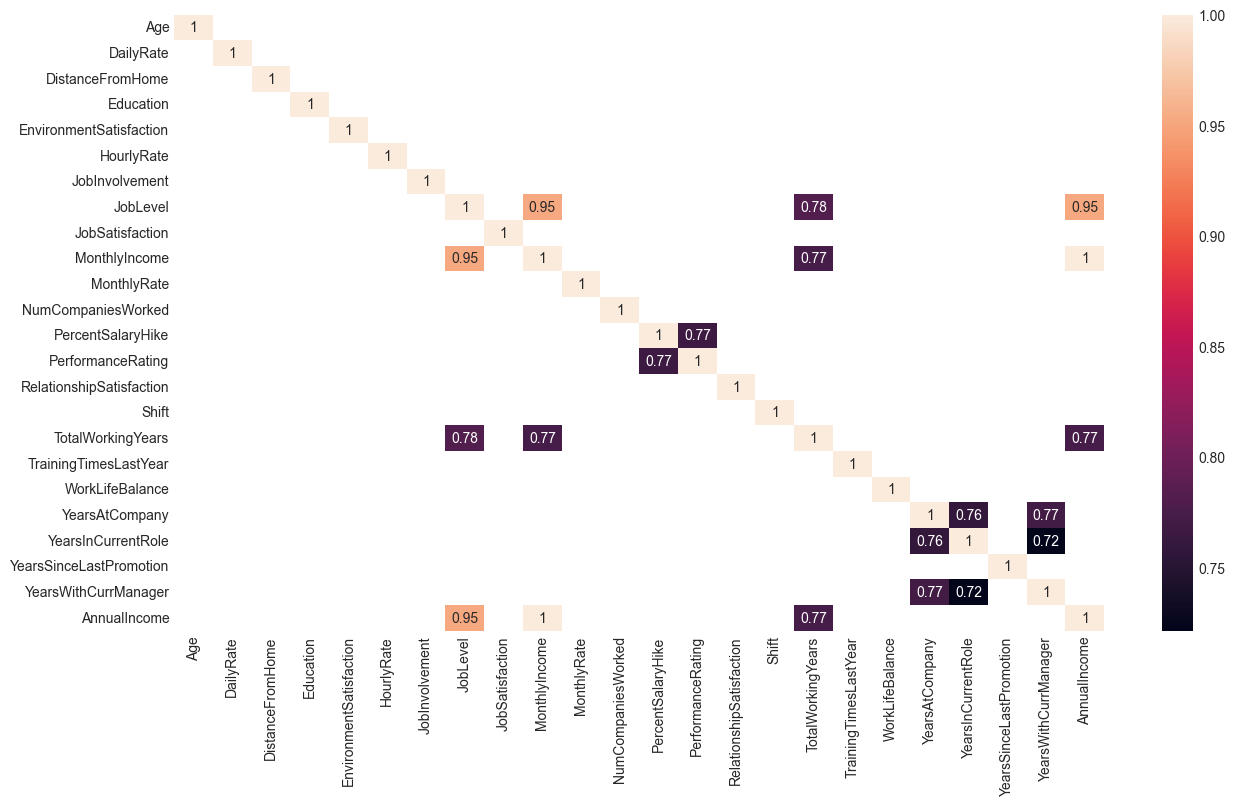

In [110]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, mask=correlation < 0.7, annot=True)

### Random Forest


In [111]:
def transform_attrition(x):
    if x == "Yes":
        return 1
    else:
        return 0


df["Attrition"] = df["Attrition"].apply(transform_attrition)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AnnualIncome
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,71916
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,61560
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,25080
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,34908
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,41616


In [112]:
y = df["Attrition"]

X = df.drop("Attrition", axis=1)

X = pd.get_dummies(X)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


In [114]:
rf = RandomForestClassifier(random_state=0)

In [115]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [116]:
y_pred = rf.predict(X_test)

In [117]:
ac = accuracy_score(y_test, y_pred)
pc = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [118]:
def round_value(x):
    x = round(x, 3)

    return x


f1 = round_value(f1)
rc = round_value(rc)
pc = round_value(pc)
ac = round_value(ac)

In [119]:
table = pd.DataFrame()
table = table.append(
    {
        "Model": "Random Forest",
        "F1": f1,
        "Recall": rc,
        "Precision": pc,
        "Accuracy": ac,
    },
    ignore_index=True,
)
table


/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_77447/254035493.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(


,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.568,0.439,0.806,0.909


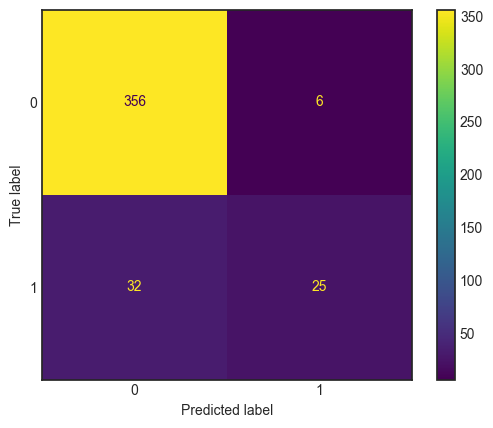

In [120]:
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    displ = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    displ.plot(values_format="")
    plt.show()


conf_matrix_plot(rf, X_test, y_test)

### Decision Tree


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


In [123]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [124]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [125]:
dt_pred = decision_tree.predict(X_test)

In [126]:
ac_1 = accuracy_score(y_test, dt_pred)
pc_1 = precision_score(y_test, dt_pred)
rc_1 = recall_score(y_test, dt_pred)
f1_1 = f1_score(y_test, dt_pred)

ac_1 = round_value(ac_1)
pc_1 = round_value(pc_1)
rc_1 = round_value(rc_1)
f1_1 = round_value(f1_1)


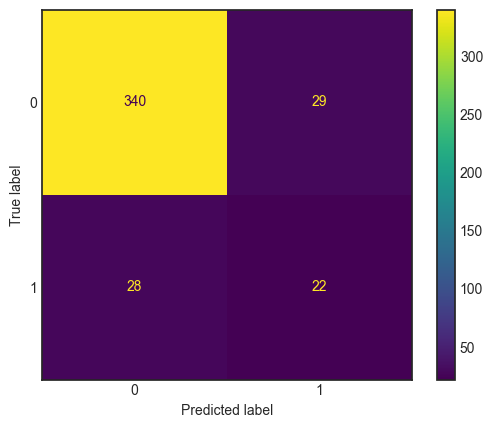

In [127]:
conf_matrix_plot(decision_tree, X_test, y_test)

In [128]:
table = table.append(
    {
        "Model": "Decsion Tree",
        "F1": f1_1,
        "Recall": rc_1,
        "Precision": pc_1,
        "Accuracy": ac_1,
    },
    ignore_index=True,
)
table

/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_77447/3495633798.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(


,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.568,0.439,0.806,0.909
1,Decsion Tree,0.436,0.440,0.431,0.864


In [129]:
from xgboost import XGBClassifier

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [131]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
xg_pred = xgb_model.predict(X_test)


In [133]:
ac_2 = accuracy_score(y_test, xg_pred)
pc_2 = precision_score(y_test, xg_pred)
rc_2 = recall_score(y_test, xg_pred)
f1_2 = f1_score(y_test, xg_pred)

ac_2 = round_value(ac_2)
pc_2 = round_value(pc_2)
rc_2 = round_value(rc_2)
f1_2 = round_value(f1_2)

In [134]:
table = table.append(
    {
        "Model": "XGBoost",
        "F1": f1_2,
        "Recall": rc_2,
        "Precision": pc_2,
        "Accuracy": ac_2,
    },
    ignore_index=True,
)
table


/var/folders/9r/m3130z5s3rbc10_6scgfp5t00000gn/T/ipykernel_77447/2243500697.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(


,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.568,0.439,0.806,0.909
1,Decsion Tree,0.436,0.440,0.431,0.864
2,XGBoost,0.637,0.509,0.853,0.921


### TAKEAWAYS


In using this hospital data, The goal of my analysis was to figure out attrition rates between the different job roles and what factors played a role in this.

The data was pretty clean with it needed just to drop some columns that wouldn’t be necessary to the analysis. A boxplot and histograms were created to look for outliers in the dataset. I didn’t find anything that stood out and would have been troubling for the analysis.

I wanted the stakeholders to have a good understanding about the employees that work at their hospital. We looked at the distribution of roles at the hospital and compared pay ranges. Nurses made up 50% of the workforce and were most likely to leave their jobs along with “Others”. I wanted to figure out why this might be, as satisfaction levels were on average very close. My next thought was to look at family life. Checking marital status and shifts being worked. I found that with more nurses and other positions working long 8-12 hour shifts in the afternoon, this might affect their family time. They’ll be missing out on daytime activities with family and friends in a busy hospital.

I created two different models for this project. Random forest had higher accuracy and indicated that the model would predict 80% correct if an employee would level the hospital. Model running would be needed to be done on the models to get better scores.


NOTE: XGBoost is now the most accurate model
